# Introduction to Machine Learning and Deep Learning

### Acknowledgements

The content of this notebook was originally created by Nils Eckstein, Julia Buhmann, and Jan Funke for the 2021 DL@MBL course in Woods Hole, and later chopped up and modified by Florian Jug and Igor Zubarev for the 2022 course DL4MIA.

Some code cells will be marked with

########################################################################### <br>
#######                      START OF YOUR CODE                     ####### <br>
########################################################################### <br>

... <br>

########################################################################### <br>
#######                       END OF YOUR CODE                      ####### <br>
########################################################################### <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Use Keras to Train a (Small) Neural Network

The previous task demonstrated that chosing the weights of a neural network by hand can be quite painful even for simple functions. This will certainly get out of hand once we have more complex networks with several layers and many neurons per layer. But more importantly, the reason why we want to use neural networks to approximate a function is that (in general) we do not know exactly what the function is. We only have data points that describe the function implicitly.

In this task, we will design, train, and evaluate a neural network that can classify points of two different classes on a 2D plane, i.e., the input to our network are the coordinates of points in a plane. Net initial network we want to build should have one hidden layer containing 12 nodes (perceptrons) that receive input from two nodes each, and are themselves connected to one single output node that should predict a binary class for the given input (x,y).

For training this network, we will create a training and a testing dataset. We will then create the network and use stochastic gradient descent to train all network parameters on the training dataset and evaluate its performance on the testing dataset.

## Generate Training Data...

We create both training and testing dataset from the following function (in practice, we would not know this function but have only the data available):

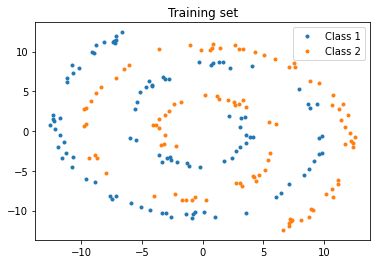

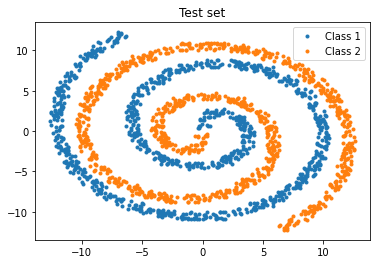

In [3]:
def generate_spiral_data(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_train, y_train = generate_spiral_data(100)

plt.title('Training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='Class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='Class 2')
plt.legend()
plt.show()

X_test, y_test = generate_spiral_data(1000)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='Class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='Class 2')
plt.legend()
plt.show()

# Let's create and train the network on the generated data...

Please note how incredible short this code is... that's the power of modern neural network libraries...
Try to understand what is roughly going on in the cell below... feel free to use google to figure out what some parts might mean...

In [5]:
simple_model = Sequential()
simple_model.add(Dense(12, input_dim=2, activation='tanh'))
simple_model.add(Dense(1, activation='sigmoid'))

simple_model.compile(loss='mean_squared_error',
                optimizer='SGD', # SGD = Stochastic Gradient Descent
                metrics=['accuracy'])

# Train the model
# Set verbose parameter to 1 to output the training stats
simple_model.fit(X_train, y_train, epochs=200, batch_size=32,  verbose=1)

# Predict on the testing data
prediction = np.round(simple_model.predict(X_test).T[0])

Epoch 1/200
7/7 [==============================] - 0s 736us/step - loss: 0.3562 - accuracy: 0.5000
Epoch 2/200
7/7 [==============================] - 0s 753us/step - loss: 0.3527 - accuracy: 0.5000
Epoch 3/200
7/7 [==============================] - 0s 687us/step - loss: 0.3496 - accuracy: 0.5100
Epoch 4/200
7/7 [==============================] - 0s 865us/step - loss: 0.3466 - accuracy: 0.5200
Epoch 5/200
7/7 [==============================] - 0s 669us/step - loss: 0.3436 - accuracy: 0.5200
Epoch 6/200
7/7 [==============================] - 0s 654us/step - loss: 0.3400 - accuracy: 0.5400
Epoch 7/200
7/7 [==============================] - 0s 730us/step - loss: 0.3368 - accuracy: 0.5400
Epoch 8/200
7/7 [==============================] - 0s 720us/step - loss: 0.3338 - accuracy: 0.5300
Epoch 9/200
7/7 [==============================] - 0s 867us/step - loss: 0.3309 - accuracy: 0.5300
Epoch 10/200
7/7 [==============================] - 0s 693us/step - loss: 0.3285 - accuracy: 0.5350
Epoch 11/

7/7 [==============================] - 0s 845us/step - loss: 0.2361 - accuracy: 0.6350
Epoch 84/200
7/7 [==============================] - 0s 670us/step - loss: 0.2358 - accuracy: 0.6400
Epoch 85/200
7/7 [==============================] - 0s 647us/step - loss: 0.2352 - accuracy: 0.6450
Epoch 86/200
7/7 [==============================] - 0s 619us/step - loss: 0.2347 - accuracy: 0.6800
Epoch 87/200
7/7 [==============================] - 0s 674us/step - loss: 0.2341 - accuracy: 0.6800
Epoch 88/200
7/7 [==============================] - 0s 679us/step - loss: 0.2337 - accuracy: 0.6600
Epoch 89/200
7/7 [==============================] - 0s 671us/step - loss: 0.2333 - accuracy: 0.6650
Epoch 90/200
7/7 [==============================] - 0s 633us/step - loss: 0.2330 - accuracy: 0.6700
Epoch 91/200
7/7 [==============================] - 0s 893us/step - loss: 0.2327 - accuracy: 0.6650
Epoch 92/200
7/7 [==============================] - 0s 673us/step - loss: 0.2323 - accuracy: 0.6700
Epoch 93/200


7/7 [==============================] - 0s 1ms/step - loss: 0.2194 - accuracy: 0.6900
Epoch 165/200
7/7 [==============================] - 0s 672us/step - loss: 0.2194 - accuracy: 0.6900
Epoch 166/200
7/7 [==============================] - 0s 693us/step - loss: 0.2192 - accuracy: 0.6900
Epoch 167/200
7/7 [==============================] - 0s 647us/step - loss: 0.2191 - accuracy: 0.6900
Epoch 168/200
7/7 [==============================] - 0s 653us/step - loss: 0.2190 - accuracy: 0.6900
Epoch 169/200
7/7 [==============================] - 0s 937us/step - loss: 0.2189 - accuracy: 0.6900
Epoch 170/200
7/7 [==============================] - 0s 644us/step - loss: 0.2188 - accuracy: 0.6900
Epoch 171/200
7/7 [==============================] - 0s 684us/step - loss: 0.2187 - accuracy: 0.6900
Epoch 172/200
7/7 [==============================] - 0s 660us/step - loss: 0.2187 - accuracy: 0.6900
Epoch 173/200
7/7 [==============================] - 0s 775us/step - loss: 0.2184 - accuracy: 0.6900
Epoch 

Now that training is done, let's plot the results...

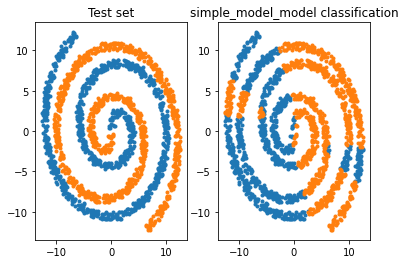

In [6]:
def plot_results(pred, model_name):
    plt.subplot(1,2,1)

    plt.title('Test set')
    plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
    plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
    plt.subplot(1,2,2)

    plt.title(f'{model_name}_model classification')
    plt.plot(X_test[pred==0,0], X_test[pred==0,1], '.')
    plt.plot(X_test[pred==1,0], X_test[pred==1,1], '.')
    plt.show()

plot_results(prediction, 'simple_model')

And the result is... **BAD!**

This is, because the network is likely not powerful enough... hence, the model we used is not adequate for the training task at hand.

## Exercise: find a better solution...

Create a second network that is somehow different and performs the task better...

**Hint**: Likely it is a good idea to copy the cell from above and somehow change it in a meaningful way.

In [7]:
###########################################################################
#######                      START OF YOUR CODE                     #######
###########################################################################

# create an alternative model (network) here and train it as we did before...
# currently good_model is the same as the network from above... just to give you a starting point...

# Go massive on layering (like 6 additions of relu 64 layers each)

good_model = Sequential()
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(1, activation='sigmoid'))

###########################################################################
#######                       END OF YOUR CODE                      #######
###########################################################################

# Visualize the architecture 
good_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                192       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                

# Train the model
Write the configuration and training code in the following cell.

**Hint**: You'd need to configure model for training with compile function, provide training data and hyperparameters

In [8]:
# Configure model for training
###########################################################################
#######                      START OF YOUR CODE                     #######
###########################################################################

#Hint: You'd need to compile the model with the correct loss function, optimizer and metric...
good_model.compile(loss='binary_crossentropy',
                optimizer='adam', # SGD = Stochastic Gradient Descent
                metrics=['accuracy'])

                   
# Train the model
history = good_model.fit(X_train, y_train, epochs=200, batch_size=10,  verbose=1) # reduce batch size

# Predict on the testing data
prediction = np.round(good_model.predict(X_test).T[0])

###########################################################################
#######                       END OF YOUR CODE                      #######
###########################################################################

Epoch 1/200
20/20 [==============================] - 0s 790us/step - loss: 0.6707 - accuracy: 0.5750
Epoch 2/200
20/20 [==============================] - 0s 756us/step - loss: 0.6214 - accuracy: 0.6600
Epoch 3/200
20/20 [==============================] - 0s 783us/step - loss: 0.6058 - accuracy: 0.6650
Epoch 4/200
20/20 [==============================] - 0s 787us/step - loss: 0.6019 - accuracy: 0.6600
Epoch 5/200
20/20 [==============================] - 0s 780us/step - loss: 0.5969 - accuracy: 0.6600
Epoch 6/200
20/20 [==============================] - 0s 814us/step - loss: 0.5981 - accuracy: 0.6600
Epoch 7/200
20/20 [==============================] - 0s 759us/step - loss: 0.5854 - accuracy: 0.6600
Epoch 8/200
20/20 [==============================] - 0s 753us/step - loss: 0.5875 - accuracy: 0.6650
Epoch 9/200
20/20 [==============================] - 0s 779us/step - loss: 0.5925 - accuracy: 0.6700
Epoch 10/200
20/20 [==============================] - 0s 769us/step - loss: 0.5784 - accura

20/20 [==============================] - 0s 756us/step - loss: 0.3749 - accuracy: 0.8250
Epoch 82/200
20/20 [==============================] - 0s 760us/step - loss: 0.3912 - accuracy: 0.7950
Epoch 83/200
20/20 [==============================] - 0s 748us/step - loss: 0.3771 - accuracy: 0.8150
Epoch 84/200
20/20 [==============================] - 0s 784us/step - loss: 0.3507 - accuracy: 0.8250
Epoch 85/200
20/20 [==============================] - 0s 769us/step - loss: 0.3211 - accuracy: 0.8600
Epoch 86/200
20/20 [==============================] - 0s 752us/step - loss: 0.3370 - accuracy: 0.8250
Epoch 87/200
20/20 [==============================] - 0s 813us/step - loss: 0.3241 - accuracy: 0.8500
Epoch 88/200
20/20 [==============================] - 0s 853us/step - loss: 0.3257 - accuracy: 0.8350
Epoch 89/200
20/20 [==============================] - 0s 766us/step - loss: 0.3546 - accuracy: 0.8550
Epoch 90/200
20/20 [==============================] - 0s 792us/step - loss: 0.3594 - accuracy: 

20/20 [==============================] - 0s 750us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 161/200
20/20 [==============================] - 0s 765us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 162/200
20/20 [==============================] - 0s 747us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 163/200
20/20 [==============================] - 0s 752us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 164/200
20/20 [==============================] - 0s 769us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 165/200
20/20 [==============================] - 0s 792us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 166/200
20/20 [==============================] - 0s 747us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 167/200
20/20 [==============================] - 0s 730us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 168/200
20/20 [==============================] - 0s 742us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 169/200
20/20 [==============================] - 0s 742us/step - loss: 0.0010 - a

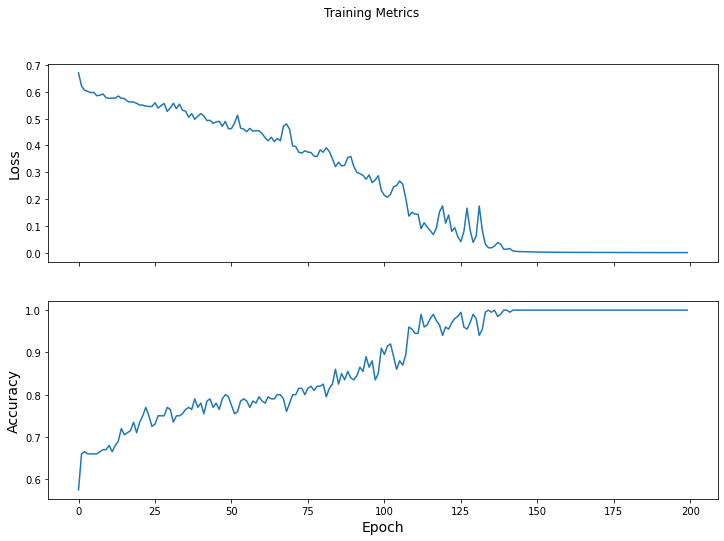

In [9]:
# Plot training metrics
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(history.history['loss'])
axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(history.history['accuracy'])
plt.show()

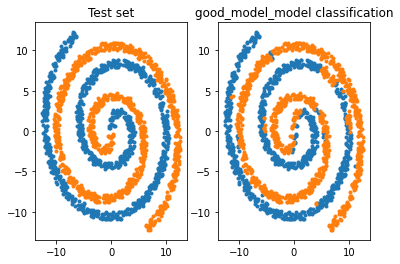

In [10]:
# Even if we have loss of zero and accuracy of 100, we 
#still get errors because of the fact that the training data is not fully recapitulating the 
#reality of the data.
plot_results(prediction, 'good_model')

# Bonus exercise: A glimpse under the hood

Keras `fit()` and `evaluate()` functions provide useful abstraction, which would be enough for many basic tasks. However in some cases, like generative adversarial network(GAN) training, you may need to write a customized training loop. In the following cell you can see what's going on on the low level. 
<br>
<br>
You can use the original Tensorflow tutorials(https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough) and [here](https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch) as a reference

**Hint** You may need to restart the kernel. To correctry run this cell skip the cell with `model.compile()` and `model.fit()` 

In [ ]:
import tensorflow as tf


train_loss_results = []
train_accuracy_results = []

num_epochs = 300
batch_size = 10

# Create a dataset object using tf.data api 
dataset_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Define loss function
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Training loop - iterating over number of epochs
for epoch in range(num_epochs):
    # Define metrics
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.BinaryAccuracy()
    
    # Iterating over dataset, batch by batch
    for x, y in dataset_train.batch(batch_size):
        
        # Define GradientTape to record the operations during the forward pass
        with tf.GradientTape() as tape:
            
            # Run forward pass on a batch. training is only needs to be set to True if there are layers with 
            # different behavior during training versus inference (e.g. Dropout).
            pred = good_model(x, training=True)
            
            # Compute the loss
            loss_value = loss(y_true=y, y_pred=pred)
            
            # Get the gradients of the loss with respect to the trainable parameters.
            grads = tape.gradient(loss_value, good_model.trainable_variables)
            
            # Run one step of gradient descent by updating the value of the variables to minimize the loss.
            optimizer.apply_gradients(zip(grads, good_model.trainable_variables))

        # Track progress. # Add current batch loss and accuracy
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, pred)

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 10 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch, epoch_loss_avg.result(), epoch_accuracy.result()))

In [ ]:
# Plot training metrics
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [ ]:
# Predict on the testing data and plot the results
prediction2 = np.round(good_model.predict(X_test).T[0])

plot_results(prediction2, 'good_model')

### Done? Cooool!

You should now make a short coding break and visit the website https://playground.tensorflow.org

Play a bit with it... figure out what elements are part of a typical network training workflow.